In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [113]:
df = pd.read_parquet("feature_enginnering.parquet")

In [114]:
df.head()

,CustomerID,Gender,Customer_City,ProductName,Category,SubCategory,UnitPrice,CostPrice,Date,Quantity,...,Profit,ProfitMargin,Year,Month,Day,Weekday,Quarter,PriceRange,DiscountLevel,TotalCost
0,C001,M,Osborneport,Like Camera,Electronics,Camera,1673.69,1323.38,2025-06-28,2,...,700.62,20.930399,2025,6,28,Saturday,2,Premium,Low,2646.76
1,C001,M,Osborneport,Like Camera,Electronics,Camera,1673.69,1323.38,2023-12-21,3,...,1050.93,22.031999,2023,12,21,Thursday,4,Premium,Low,3970.14
2,C001,M,Osborneport,Audience Television,Electronics,Television,818.76,527.62,2025-06-28,3,...,873.42,37.430158,2025,6,28,Saturday,2,Premium,Low,1582.86
3,C001,M,Osborneport,Audience Television,Electronics,Television,818.76,527.62,2024-04-21,3,...,873.42,37.430158,2024,4,21,Sunday,2,Premium,Low,1582.86
4,C001,M,Osborneport,Here Footwear,Fashion,Footwear,337.63,169.03,2025-03-02,1,...,168.60,55.484801,2025,3,2,Sunday,1,High,Medium,169.03


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerID     5000 non-null   object        
 1   Gender         5000 non-null   object        
 2   Customer_City  5000 non-null   object        
 3   ProductName    5000 non-null   object        
 4   Category       5000 non-null   object        
 5   SubCategory    5000 non-null   object        
 6   UnitPrice      5000 non-null   float64       
 7   CostPrice      5000 non-null   float64       
 8   Date           5000 non-null   datetime64[ns]
 9   Quantity       5000 non-null   int64         
 10  Discount       5000 non-null   float64       
 11  PaymentMethod  5000 non-null   object        
 12  StoreName      5000 non-null   object        
 13  Store_City     5000 non-null   object        
 14  Region         5000 non-null   object        
 15  Revenue        5000 n

In [8]:
df['Date'] =  pd.to_datetime(df['Date'])

In [9]:
df.isnull().sum()

CustomerID       0
Gender           0
Customer_City    0
ProductName      0
Category         0
SubCategory      0
UnitPrice        0
CostPrice        0
Date             0
Quantity         0
Discount         0
PaymentMethod    0
StoreName        0
Store_City       0
Region           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [136]:
numerical_feature = [i for i in df.columns if df[i].dtypes in  ['int32','int64','float64']]
categorical_feature = [j for j in df.columns if df[j].dtypes == 'O']

In [137]:
print("Categorical Feature : ",categorical_feature)
print("Numerical Feature : ",numerical_feature)

Categorical Feature :  ['CustomerID', 'Gender', 'Customer_City', 'ProductName', 'Category', 'SubCategory', 'PaymentMethod', 'StoreName', 'Store_City', 'Region', 'Weekday']
Numerical Feature :  ['UnitPrice', 'CostPrice', 'Quantity', 'Discount', 'Revenue', 'Profit', 'ProfitMargin', 'Year', 'Month', 'Day', 'Quarter', 'TotalCost']


## Univariate Ananlysis

##### For Numerical Features

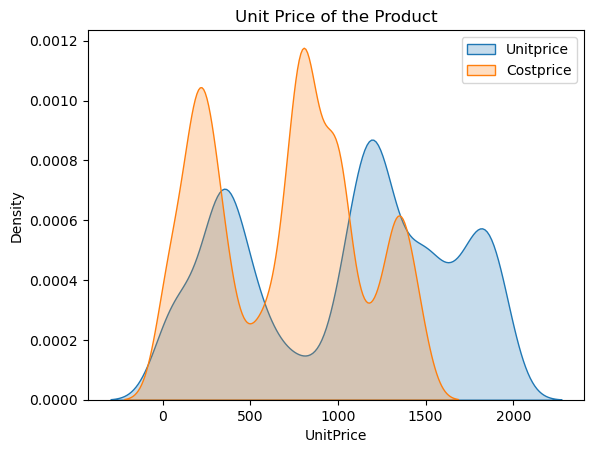

In [61]:

## check the Distribution of the data Unit Price

sns.kdeplot(df['UnitPrice'],fill = True)  ## In this graph we can see this three most frequent value present in the UnitPrice feature
sns.kdeplot(df['CostPrice'],fill = True)
plt.title("Unit Price of the Product")
plt.legend(["Unitprice","Costprice"])

<Axes: xlabel='Quantity'>

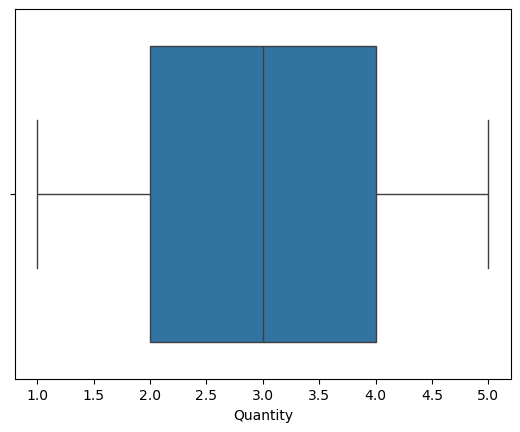

In [20]:
sns.boxplot(df['Quantity'],orient = 'h',)

In [21]:
numerical_feature

['UnitPrice', 'CostPrice', 'Date', 'Quantity', 'Discount']

In [22]:
df['UnitPrice'].skew()

-0.18560808637110907

In [25]:
df['CostPrice'].skew()

0.02365529955136588

In [26]:
df['UnitPrice'].mean()

1036.606538

In [27]:
df['UnitPrice'].median()

1193.09

## checking the Outlier Present in the UnitPrice

<Axes: xlabel='UnitPrice'>

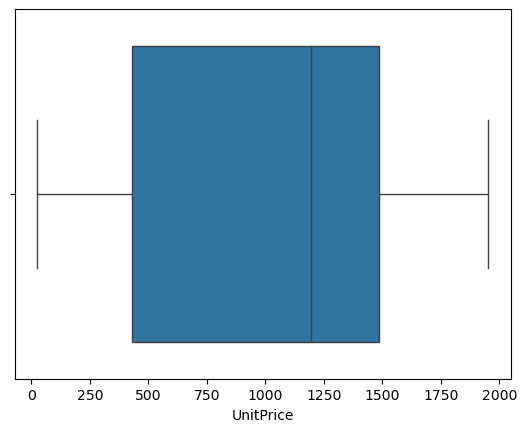

In [31]:
sns.boxplot(df['UnitPrice'],orient='h')

<Axes: xlabel='CostPrice'>

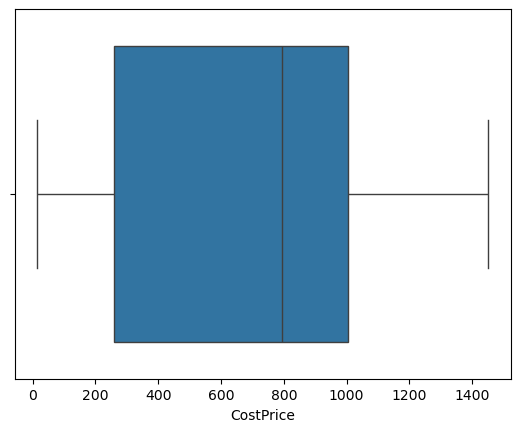

In [34]:
sns.boxplot(df['CostPrice'],orient = 'h')

In [58]:

outlier_summary = {}

for col in numerical_feature:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]


    print(outliers)




Empty DataFrame
Columns: [CustomerID, Gender, Customer_City, ProductName, Category, SubCategory, UnitPrice, CostPrice, Date, Quantity, Discount, PaymentMethod, StoreName, Store_City, Region]
Index: []
Empty DataFrame
Columns: [CustomerID, Gender, Customer_City, ProductName, Category, SubCategory, UnitPrice, CostPrice, Date, Quantity, Discount, PaymentMethod, StoreName, Store_City, Region]
Index: []
Empty DataFrame
Columns: [CustomerID, Gender, Customer_City, ProductName, Category, SubCategory, UnitPrice, CostPrice, Date, Quantity, Discount, PaymentMethod, StoreName, Store_City, Region]
Index: []
Empty DataFrame
Columns: [CustomerID, Gender, Customer_City, ProductName, Category, SubCategory, UnitPrice, CostPrice, Date, Quantity, Discount, PaymentMethod, StoreName, Store_City, Region]
Index: []
Empty DataFrame
Columns: [CustomerID, Gender, Customer_City, ProductName, Category, SubCategory, UnitPrice, CostPrice, Date, Quantity, Discount, PaymentMethod, StoreName, Store_City, Region]
Index

## There is no outlier present in the given numerical_features 

##### For Categorical Features

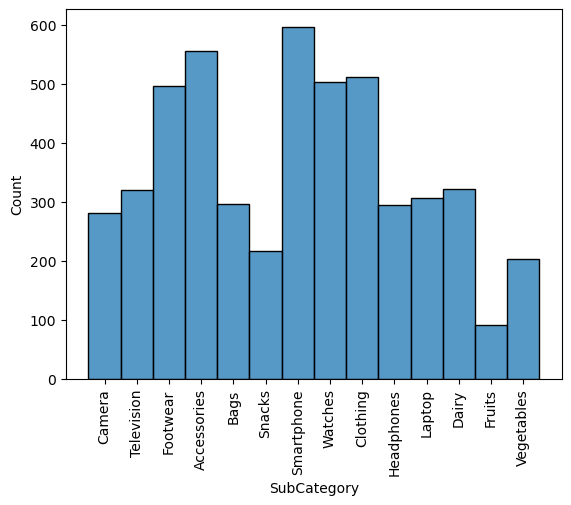

In [79]:
sns.histplot(df['SubCategory'],)
plt.xticks(rotation = 90)
plt.show()

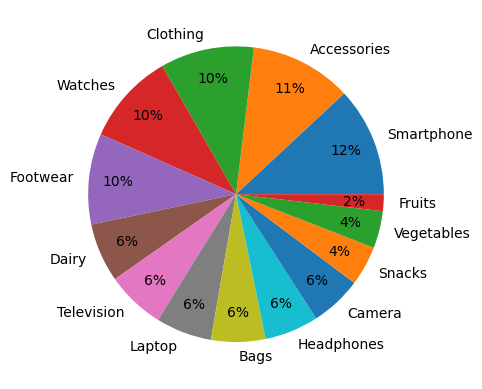

In [56]:
product =  df['SubCategory'].value_counts()

plt.pie(product,labels=product.index,pctdistance=0.80,autopct = '%.0f%%')
plt.show()

## Quick KPIs

In [45]:
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['ProfitMargin'].mean()
num_transactions = len(df)
num_customers = df['CustomerID'].nunique()
top_category = df.groupby('Category')['Revenue'].sum().idxmax()

kpis = {
    'Total Revenue': total_revenue,
    'Total Profit': total_profit,
    'Avg Profit Margin (%)': avg_profit_margin,
    'Transactions': num_transactions,
    'Unique Customers': num_customers,
    'Top Category by Revenue': top_category
}
kpis


{'Total Revenue': 14301903.147499999,
 'Total Profit': 4999583.24,
 'Avg Profit Margin (%)': 36.41266938584887,
 'Transactions': 5000,
 'Unique Customers': 200,
 'Top Category by Revenue': 'Electronics'}

## Transcation per Category 

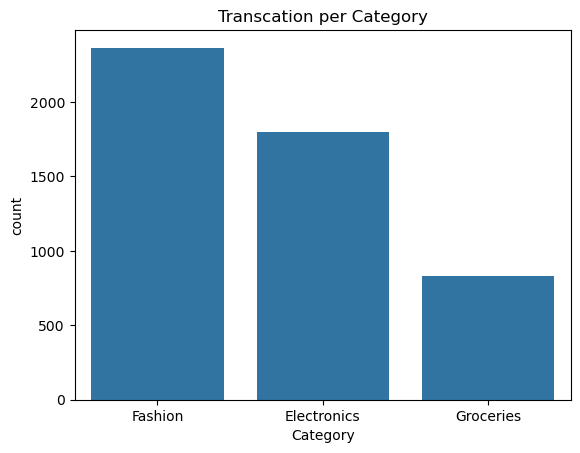

In [55]:
orders = df['Category'].value_counts().index
sns.countplot(data = df,x='Category',order = orders)
plt.title("Transcation per Category")
plt.show()

## Bivariate Analysis

## A. Category vs Revenue

Which product category generates the most revenue?

Category
Electronics    6.316917
Fashion        6.232280
Groceries      1.752706
Name: Revenue, dtype: float64

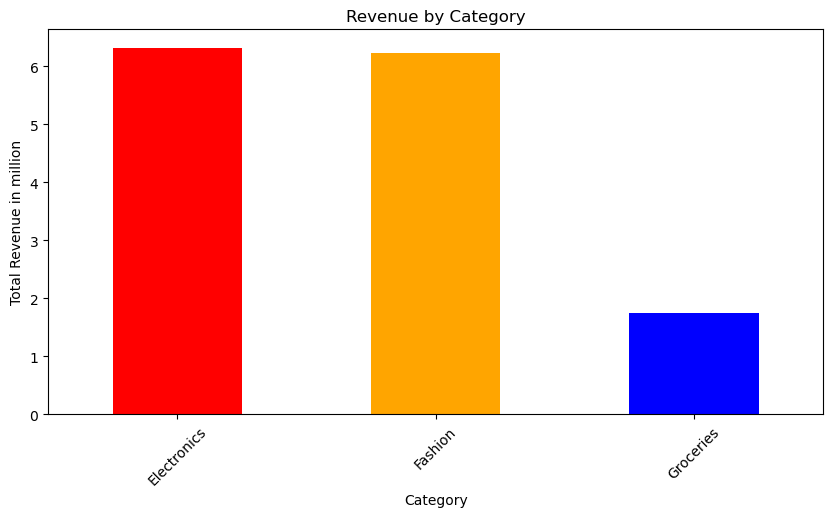

In [72]:
# Aggregate revenue by category
category_rev = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)/1000000

# View table
display(category_rev)

# Plot
plt.figure(figsize=(10,5))
category_rev.plot(kind='bar',color = ['red','orange','Blue'])
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue in million')
plt.xticks(rotation=45)
plt.show()


## B. SubCategory vs Revenue
Which subcategories sell the most?

SubCategory
Accessories    19.151566
Smartphone     18.533611
Clothing       14.596633
Television     13.413017
Dairy          12.215344
Camera         11.308056
Footwear       10.902447
Laptop         10.852418
Watches         9.494743
Headphones      9.062070
Bags            8.177409
Snacks          3.568216
Vegetables      0.921659
Fruits          0.821841
Name: Revenue, dtype: float64

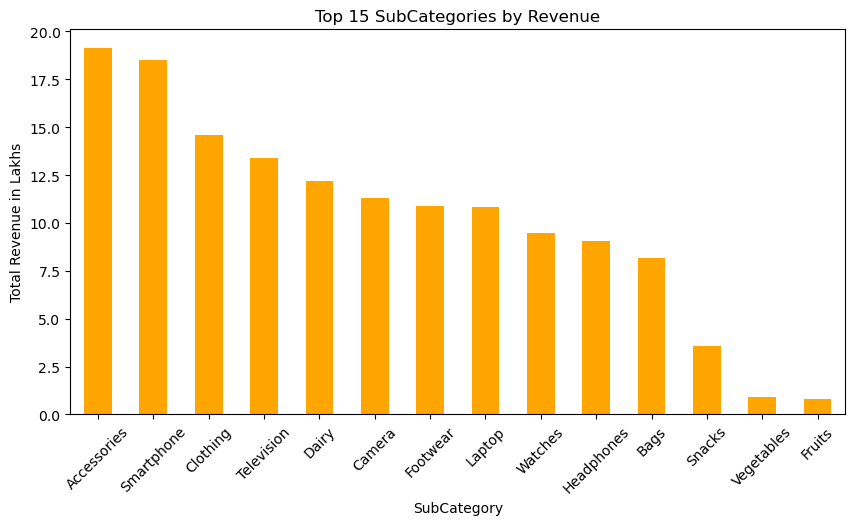

In [77]:
subcat_rev = df.groupby('SubCategory')['Revenue'].sum().sort_values(ascending=False)/100000

display(subcat_rev.head(15))   # show top 15

plt.figure(figsize=(10,5))
subcat_rev.head(15).plot(kind='bar', color='orange')
plt.title('Top 15 SubCategories by Revenue')
plt.xlabel('SubCategory')
plt.ylabel('Total Revenue in Lakhs')
plt.xticks(rotation=45)
plt.show()


## C. Region vs Revenue
Which region is the highest performer?

Region
East     5.600680
West     2.920407
North    2.900701
South    2.880115
Name: Revenue, dtype: float64

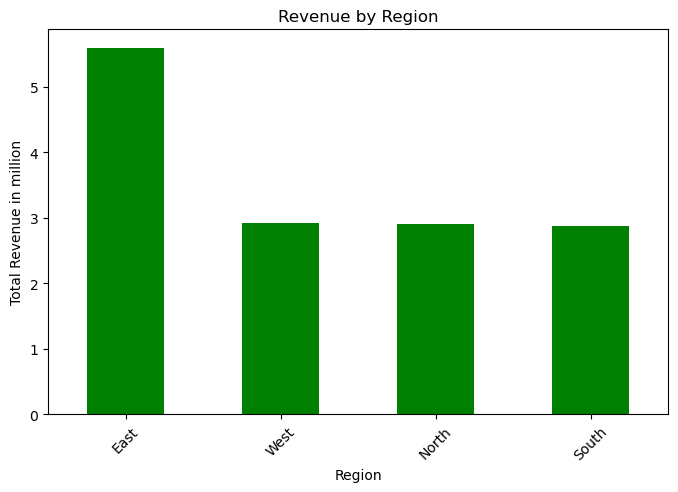

In [89]:
region_rev = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)/1000000

display(region_rev)

plt.figure(figsize=(8,5))
region_rev.plot(kind='bar', color='green')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue in million')
plt.xticks(rotation=45)
plt.show()


## D. Gender vs Revenue
Do males or females spend more money?

Gender
M    8.070598
F    6.231305
Name: Revenue, dtype: float64

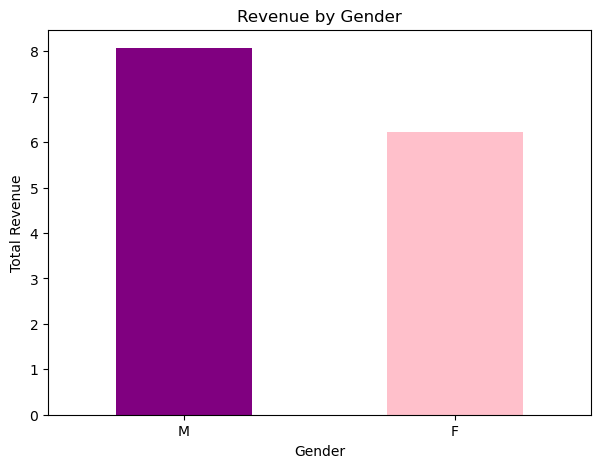

In [91]:
gender_rev = df.groupby('Gender')['Revenue'].sum().sort_values(ascending=False)/1000000

display(gender_rev)

plt.figure(figsize=(7,5))
gender_rev.plot(kind='bar', color=['purple','pink'])
plt.title('Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()


## E. Payment Method vs Revenue
Which payment method brings the most revenue?

PaymentMethod
Cash             3.676073
Credit Card      3.673747
Mobile Money     3.558433
Bank Transfer    3.393650
Name: Revenue, dtype: float64

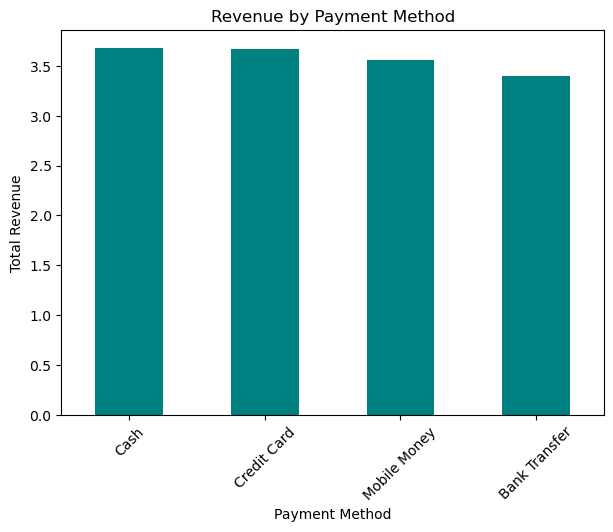

In [95]:
pay_rev = df.groupby('PaymentMethod')['Revenue'].sum().sort_values(ascending=False)/1000000

display(pay_rev)

plt.figure(figsize=(7,5))
pay_rev.plot(kind='bar', color='teal')
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


## F. StoreCity / StoreName vs Revenue
Which stores or cities perform the best?

Store_City
New Michele       2.920407
Brianahaven       2.900701
Jimenezborough    2.880115
Johnmouth         2.847048
Peckmouth         2.753633
Name: Revenue, dtype: float64

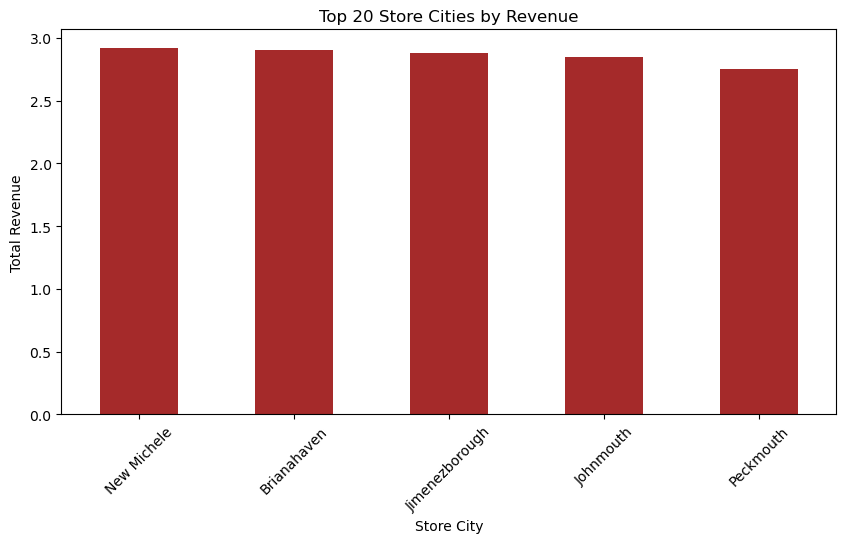

In [98]:
city_rev = df.groupby('Store_City')['Revenue'].sum().sort_values(ascending=False)/1000000

display(city_rev.head(20))   # show top 20 cities

plt.figure(figsize=(10,5))
city_rev.head(20).plot(kind='bar', color='brown')
plt.title('Top 20 Store Cities by Revenue')
plt.xlabel('Store City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


StoreName
MegaMart New Michele       2.920407
MegaMart Brianahaven       2.900701
MegaMart Jimenezborough    2.880115
MegaMart Johnmouth         2.847048
MegaMart Peckmouth         2.753633
Name: Revenue, dtype: float64

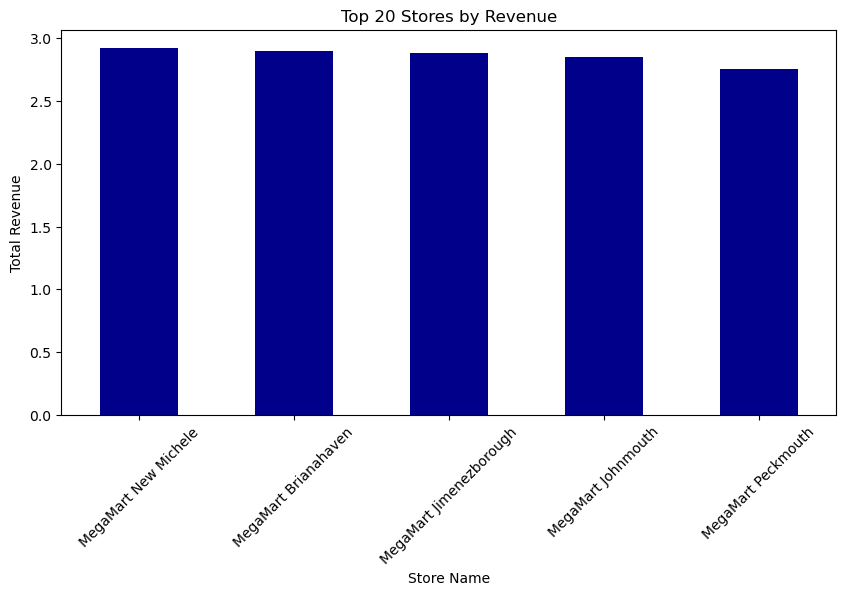

In [101]:
store_rev = df.groupby('StoreName')['Revenue'].sum().sort_values(ascending=False) / 1000000

display(store_rev.head(20))   # show top stores

plt.figure(figsize=(10,5))
store_rev.head(20).plot(kind='bar', color='darkblue')
plt.title('Top 20 Stores by Revenue')
plt.xlabel('Store Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


## Correlation Analysis (Numerical Features Only)

In [142]:
numerical = ['UnitPrice',
 'CostPrice',
 'Quantity',
 'Discount',
 'Revenue',
 'Profit',
 'ProfitMargin',
 'Year',
 'Month',
 'Day',
 'Quarter',
 'TotalCost']

In [143]:
numdf = df[numerical]

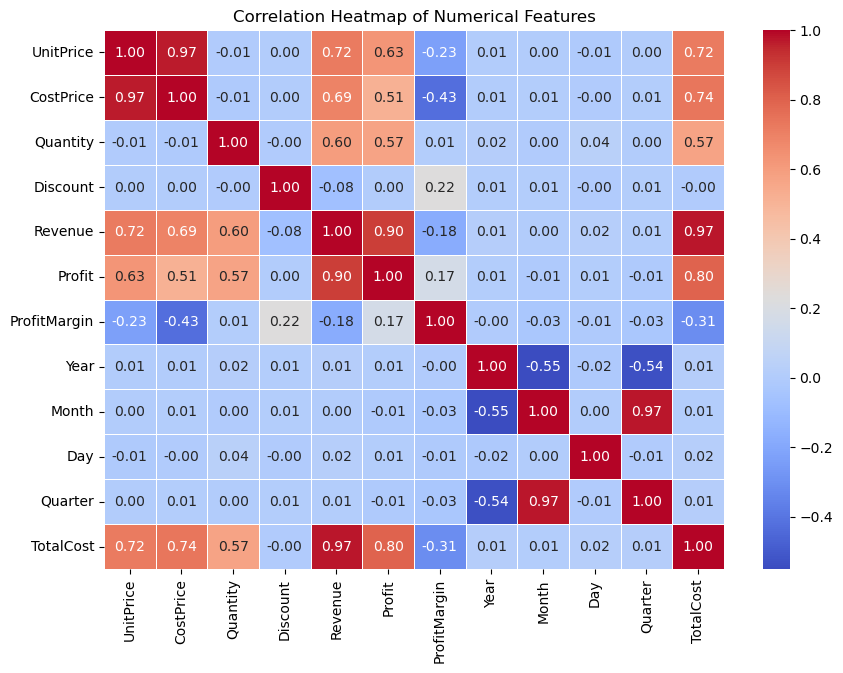

In [151]:
corr = numdf.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
